In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [2]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1]  # Aquatic mammals and Fish


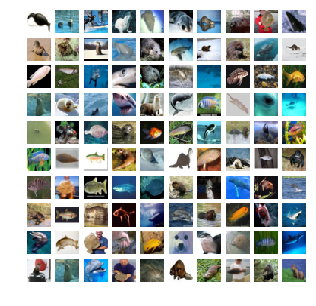

In [3]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [41]:
import numpy as np


class LogisticRegression:
    @staticmethod
    def sigmoid(y):
        y = np.clip(y, -500, 500)
        return 1.0 / (1.0 + np.exp(-y))

    @staticmethod
    def log_loss(y, ypred):
        eps = 10 ** -15
        ypred = np.clip(ypred, eps, 1 - eps)
        total_cost = -np.sum(y * np.log(ypred) + np.subtract(1, y) * np.log(np.subtract(1, ypred)))
        return total_cost / np.shape(ypred)[0]

    @staticmethod
    def get_updated_weights(w, learning_rate, x, y, ypred):
        w = w - (learning_rate * np.dot((ypred - y).T, x))
        return w
    
    @staticmethod
    def add_bias_term(x):
        return np.insert(x, 0, [1], axis=1)

    @staticmethod
    def train(x, y, iteration=100, learning_rate=1):
        X = LogisticRegression.add_bias_term(x)  # add constant 1 to account for bias
        X = X - np.mean(X)
        # X = X / np.std(X)
        labels_count = len(np.unique(y))
        weight_matrix = np.zeros((labels_count, np.shape(X)[1]))

        for i in range(iteration):
            ypred = LogisticRegression.sigmoid(X.dot(weight_matrix.T))
            loss = LogisticRegression.log_loss(y, ypred)
            if i % 100 == 0:
                print("Iteration ", i, " and loss ", loss)
            weight_matrix =\
                LogisticRegression.get_updated_weights(weight_matrix, learning_rate, X, y, ypred)

        return weight_matrix

    @staticmethod
    def predict(weight_matrix, x_test):
        return np.argmax(LogisticRegression.sigmoid(x_test.dot(weight_matrix.T)))

    @staticmethod
    def accuracy(weight_matrix, test, y_test):
        test = LogisticRegression.add_bias_term(test)
        success = 0
        number_of_samples = np.shape(test)[0]
        for i in range(number_of_samples):
            predicted_class = LogisticRegression.predict(weight_matrix, test[i, :])
            actual_class = np.argmax(y_test[i])
            if predicted_class == actual_class:
                success += 1
        print(success)
        print(number_of_samples)
        return (success / number_of_samples) * 100


In [31]:
x1 = np.array([[0, 1], [1, 0], [0, 1]])
y1 = np.array([[1, 0], [0, 1], [1, 0]])
weight_matrix = LogisticRegression.train(x1, y1, iteration=2, learning_rate=1)
LogisticRegression.accuracy(weight_matrix, x1, y1)

Iteration  0  and loss  1.38629436112


100.0

In [39]:
y_reshaped = []
for i in y:
    if i == 0:
        y_reshaped.append([1, 0])
    else:
        y_reshaped.append([0, 1])
y_reshaped = np.array(y_reshaped)
weight_matrix = LogisticRegression.train(train[:, :], y_reshaped[:, :],
                                         iteration=10000, learning_rate=0.01)

Iteration  0  and loss  1.38629436112


Iteration  100  and loss  28.0458110692


Iteration  200  and loss  27.8385760121


Iteration  300  and loss  26.7056910329


Iteration  400  and loss  26.4017462824


Iteration  500  and loss  25.6971470881


Iteration  600  and loss  25.0201792347


Iteration  700  and loss  24.9372852118


Iteration  800  and loss  25.7109627585


Iteration  900  and loss  24.2741330289


Iteration  1000  and loss  24.4399210746


Iteration  1100  and loss  24.3017643698


Iteration  1200  and loss  24.8820225299


Iteration  1300  and loss  24.6747874727


Iteration  1400  and loss  24.6609718022


Iteration  1500  and loss  24.6195247908


Iteration  1600  and loss  24.2741330289


Iteration  1700  and loss  24.1636076651


Iteration  1800  and loss  24.1221606536


Iteration  1900  and loss  24.0807136422


Iteration  2000  and loss  24.1221606536


Iteration  2100  and loss  23.873478585


Iteration  2200  and loss  23.8458472441


Iteration  2300  and loss  24.0945293127


Iteration  2400  and loss  24.1359763241


Iteration  2500  and loss  24.5918934499


Iteration  2600  and loss  24.1083449832


Iteration  2700  and loss  24.536630768


Iteration  2800  and loss  24.3293957108


Iteration  2900  and loss  24.8543911889


Iteration  3000  and loss  25.0754419166


Iteration  3100  and loss  23.8596629146


Iteration  3200  and loss  24.6333404613


Iteration  3300  and loss  24.0807136422


Iteration  3400  and loss  24.4399210746


Iteration  3500  and loss  23.9563726079


Iteration  3600  and loss  23.610980846


Iteration  3700  and loss  24.4399210746


Iteration  3800  and loss  23.4728241412


Iteration  3900  and loss  23.6662435279


Iteration  4000  and loss  24.0807136422


Iteration  4100  and loss  23.5073645168


Iteration  4200  and loss  24.2603216762


Iteration  4300  and loss  24.0047288139


Iteration  4400  and loss  23.5004542028


Iteration  4500  and loss  24.1083516998


Iteration  4600  and loss  23.0583586645


Iteration  4700  and loss  23.8113067086


Iteration  4800  and loss  23.9771011511


Iteration  4900  and loss  23.4244639372


Iteration  5000  and loss  23.8113087875


Iteration  5100  and loss  23.4451956788


Iteration  5200  and loss  22.8649327211


Iteration  5300  and loss  23.2794061938


Iteration  5400  and loss  23.4590065517


Iteration  5500  and loss  23.6178969171


Iteration  5600  and loss  22.8511197693


Iteration  5700  and loss  23.31394529


Iteration  5800  and loss  23.1481540459


Iteration  5900  and loss  23.3830196444


Iteration  6000  and loss  23.4521029543


Iteration  6100  and loss  22.5402631056


Iteration  6200  and loss  22.8994738963


Iteration  6300  and loss  22.3192128577


Iteration  6400  and loss  23.3622965385


Iteration  6500  and loss  23.3139400127


Iteration  6600  and loss  22.9892739154


Iteration  6700  and loss  23.1274374967


Iteration  6800  and loss  22.8718364784


Iteration  6900  and loss  23.3484901433


Iteration  7000  and loss  22.5748082788


Iteration  7100  and loss  23.5349964974


Iteration  7200  and loss  22.6784218893


Iteration  7300  and loss  22.8442099351


Iteration  7400  and loss  22.7820438157


Iteration  7500  and loss  22.360666106


Iteration  7600  and loss  23.3001257815


Iteration  7700  and loss  22.2086842955


Iteration  7800  and loss  22.4573713216


Iteration  7900  and loss  23.6316945166


Iteration  8000  and loss  22.5057336045


Iteration  8100  and loss  21.9392850738


Iteration  8200  and loss  22.5955195507


Iteration  8300  and loss  23.1481542058


Iteration  8400  and loss  21.393570452


Iteration  8500  and loss  22.1050813996


Iteration  8600  and loss  22.1119931528


Iteration  8700  and loss  22.1810571125


Iteration  8800  and loss  22.92020148


Iteration  8900  and loss  22.906386769


Iteration  9000  and loss  21.7389546977


Iteration  9100  and loss  21.8909281924


Iteration  9200  and loss  21.9047516989


Iteration  9300  and loss  22.5057323252


Iteration  9400  and loss  21.7182240755


Iteration  9500  and loss  21.3797427875


Iteration  9600  and loss  22.4021111984


Iteration  9700  and loss  22.0843514171


Iteration  9800  and loss  21.8632955721


Iteration  9900  and loss  21.9530906336


In [42]:
test_y_reshaped = []
for i in y:
    if i == 0:
        test_y_reshaped.append([1, 0])
    else:
        test_y_reshaped.append([0, 1])
test_y_reshaped = np.array(test_y_reshaped)
LogisticRegression.accuracy(weight_matrix, test, test_y_reshaped)


477
1000


47.699999999999996